<a href="https://colab.research.google.com/github/israelalex2323-perez/IA-013-PEREZ-REMIGIO-ISRAEL-ALEXANDER-2007050/blob/main/ACTIVIDADES/%22AF6_Decision_Tree%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#INTELIGENCIA ARTIFICIAL 013 N4 - N6
#AF6 Aprendizaje supervisado, árbol de decisión
#INTEGRANTES___________________ MATRICULA ____ CARRERA
#ISRAEL ALEXANDER PEREZ REMIGIO - 2007050 ---- IMC
#CARMEN BELÉN CONTRERAS VAZQUEZ - 2173848 ---- IMC
#GERSON MOISÉS PUENTE ARREDONDO - 1823543 ----- IMC
#FÁTIMA QUETZALI RODRÍGUEZ REYNA - 1958057 ---- IMC

In [ ]:
#1. Librerías
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#2. Cargando los datos (Breast Cancer Wisconsin (Diagnostic)):
data = load_breast_cancer()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
print("Dimensiones del conjunto de datos:")
print("\nEtiquetas (0= maligno, 1 = benigno):")
print(y.value_counts())

Dimensiones del conjunto de datos:

Etiquetas (0= maligno, 1 = benigno):
1    357
0    212
Name: count, dtype: int64


In [ ]:
#3. Preprocesamiento de datos:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print("Tamaño del conjunto de entrenamiento:", x_train.shape)
print("Tamaño del conjunto de prueba:" , x_test.shape)


Tamaño del conjunto de entrenamiento: (455, 30)
Tamaño del conjunto de prueba: (114, 30)


In [ ]:
#4. Seleccion y entrenamiento del modelo:
model = DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state=42)
model.fit(x_train, y_train)
print("\nEntrenamiento completado.")


Entrenamiento completado.



Matriz de confusion:
[[39  3]
 [ 4 68]]


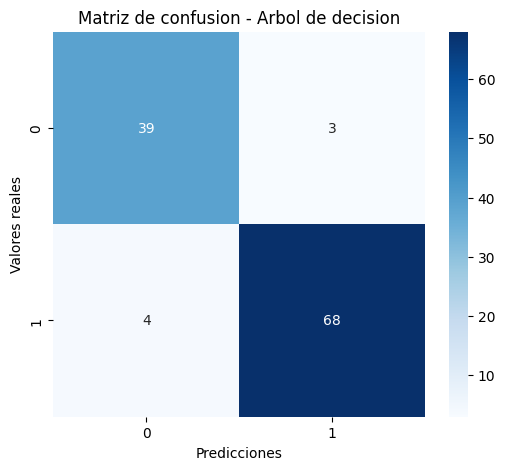


Precisión del modelo: 0.9386

Reporte de Clasificación:
              precision    recall  f1-score   support

   malignant       0.91      0.93      0.92        42
      benign       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
#5. Prueba del modelo:
y_pred = model.predict(x_test)
matriz_confusion = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusion:")
print(matriz_confusion)
plt.figure(figsize=(6, 5))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusion - Arbol de decision')
plt.show()
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

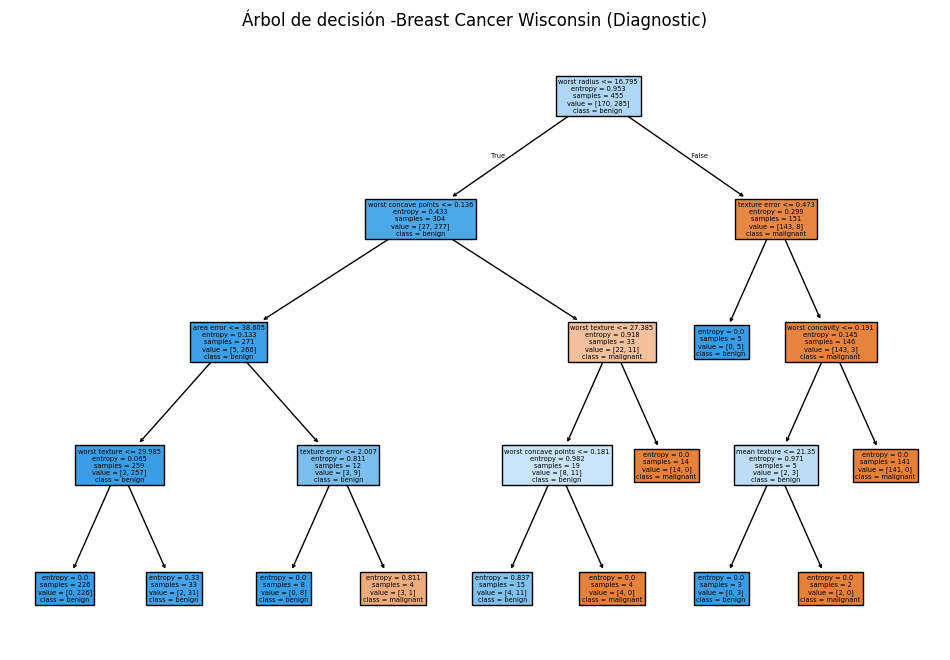

In [ ]:
#6. Demostracion del árbol de decisión:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Árbol de decisión -Breast Cancer Wisconsin (Diagnostic)")
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')
plt.show()